___
# Simulação de $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ e $\frac{\bar{X}-\mu}{S/\sqrt{n}}$ quando X~Normal
___

## Aula 23


1. Simulação da padronização de $\bar{X}$ assumindo $\sigma$ conhecido e não conhecido

___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm, t
%matplotlib inline

___
## Distribuição da Média Amostral a partir de X com distribuição Normal

In [2]:
#População
data = norm.rvs(20,4, size=1000000)
mu=np.mean(data)
sigma=np.var(data)**0.5

X segue uma distribuição Normal
Média de X ==> Valor de mu =  19.995
Variância de X ==> Valor de sigma2 = : 16.025
--------------------


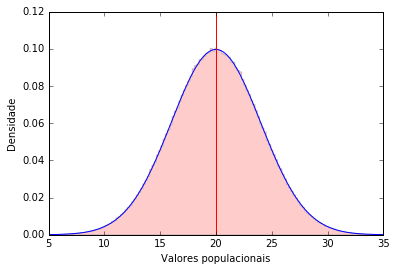

In [3]:
x = np.arange(0,40,0.2)
y = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x,y)
plt.axvline(mu, color='r')

plt.hist(data, bins=200, normed=True, histtype='stepfilled', alpha=0.2, color='r')
plt.xlabel('Valores populacionais')
plt.ylabel('Densidade')
plt.xlim(5,35)

print('X segue uma distribuição Normal')
print('Média de X ==> Valor de mu = ', "%6.3f"%mu)
print('Variância de X ==> Valor de sigma2 = :', "%6.3f"%sigma**2)
print ('-' * 20)

### **Construção da distribuição de $ Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ alterando tamanho amostral n**

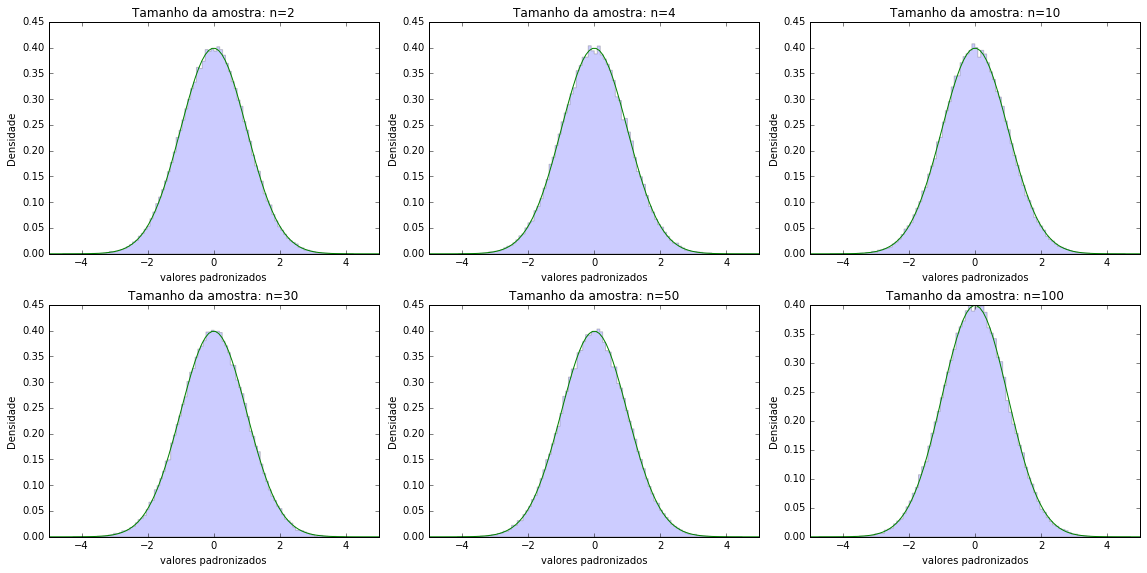

In [4]:
f, axarr = plt.subplots(2,3,figsize=(16,8))
i=0
j=0
for n in [2, 4, 10, 30, 50, 100]:
    if (n==30):
        i=1
        j=0
        
    sampling = np.random.choice(data,size=(100000,n))
    mean_of_sample = np.mean(sampling,1)
    
    #Construção do histograma com todas as médias padronizadas com o verdadeiro desvio padrão (=sigma)
    Z = (mean_of_sample - mu)/(sigma/(n)**0.5)
    axarr[i,j].hist(Z, bins=100, normed=True, histtype='stepfilled', alpha=0.2)
    
    #Construção da curva Normal Padrão
    x = np.linspace(-5,5,100)
    y = norm.pdf(x)
    axarr[i,j].plot(x,y,'g')
    
    axarr[i,j].set_title('Tamanho da amostra: n='+str(n))
    axarr[i,j].set_xlabel('valores padronizados')
    axarr[i,j].set_ylabel('Densidade')
    axarr[i,j].set_xlim(-5,5)
    #ax.set_ylim(0,.30)

    j+=1
        
plt.tight_layout(1)

### **Construção da distribuição de $t=\frac{\bar{X}-\mu}{S/\sqrt{n}}$ alterando tamanho amostral n**

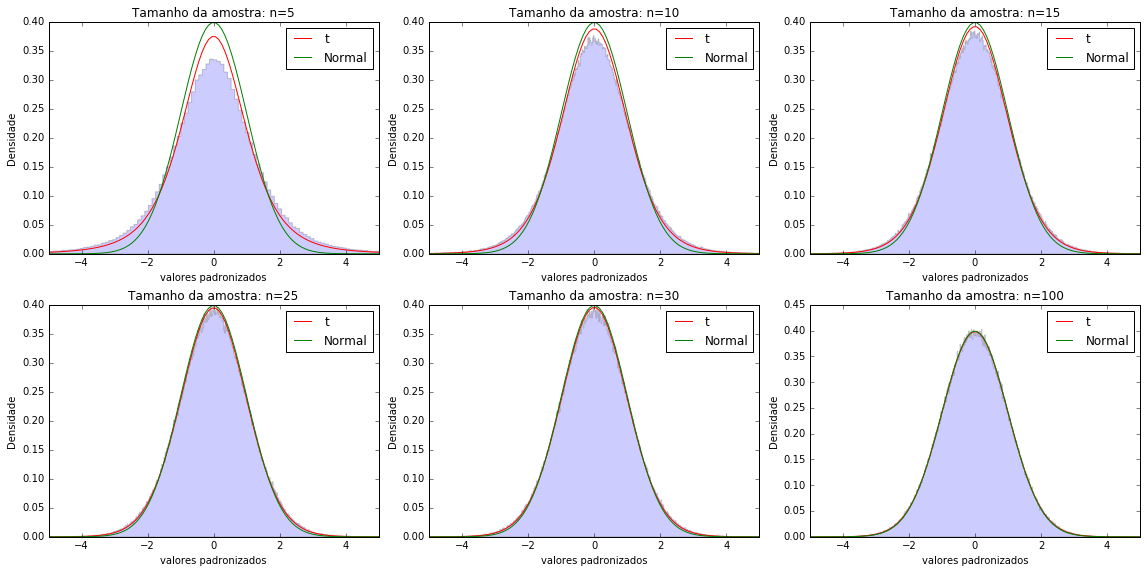

In [5]:
f, axarr = plt.subplots(2,3,figsize=(16,8))
i=0
j=0
for n in [5, 10, 15, 25, 30, 100]:
    if (n==25):
        i=1
        j=0
        
    sampling = np.random.choice(data,size=(100000,n))
    mean_of_sample = np.mean(sampling,1)
    dp_of_sample = np.std(sampling,axis=1)
    
    #Construção do histograma com todas as médias padronizadas com o desvio padrão amostral
    T=(mean_of_sample - mu)/(dp_of_sample/(n)**0.5)
    axarr[i,j].hist(T, bins=300, normed=True, histtype='stepfilled', alpha=0.2)
    
    #Construção da curva da t-student com (n-1) graus de liberdade
    x = np.linspace(-5,5,100)
    y = t.pdf(x, df=(n-1))
    axarr[i,j].plot(x,y,'r')
    
    #Construção da curva Normal Padrão
    y = norm.pdf(x)
    axarr[i,j].plot(x,y,'g')
    
    axarr[i,j].set_title('Tamanho da amostra: n='+str(n))
    axarr[i,j].set_xlabel('valores padronizados')
    axarr[i,j].set_ylabel('Densidade')
    axarr[i,j].set_xlim(-5,5)
    axarr[i,j].legend(("t","Normal"))

    j+=1
        
plt.tight_layout(1)

# Importantíssimo:

1. A padronização $t=\frac{\bar{X}-\mu}{S/\sqrt{n}}$ apenas tem distribuição *t-student* com $n-1$ graus de liberdade se a variável de interesse X segue uma distribuição Normal exata.
    1. **Curisidade:** Faça a simulação acima considerando a distribuição da variável X que assumiu no seu MiniProjeto2. Se a distribuição de X for muito distinta de uma distribuição simétrica, verá facilmente que a padronização de $\bar{X}$ utilizando o desvio padrão amostral não se encaixará em uma distribuição *t-Student*.
    
2. Para estimar a variância populacional $\sigma^2$, utilizamos a variância amostral dada por $S^2=\frac{1}{n-1}\sum^n_{i=1}(x_i-\bar{x})^2$. Note que essa variância divide por $n-1$ e não por $n$. 
    1. Para melhor compreensão desse novo estimador, **leia Magalhãoes e Lima, 7a. edição - Capítulo 7 - Exemplo 7.10 descrito na pág. 231**.